# Communicate Data Finidings > Ford GoBike System Data
## by Abdallah Sayed Ali

#### This dataset includes information about individual rides made in a bike-sharing system covering the greater New York City, NY.  This notebook will perform analyzing + Visaulaiztion for answering relevant questions. The dataset find citibikenyc's trip data for public use and its date modified was in Jun 1st 2020 with data has been collected in 2013
data set's link=https://www.citibikenyc.com/system-data
### The Data 
Each trip is anonymized and includies:
- Trip Duration (seconds)
- Start Time and Date 
- Stop Time and Date 
- Start Station Name 
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

The data has been processed to remove trips that are taken by staff as they service and inspect the system; and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it was secure 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('citibike-tripdata.csv')
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
577698,925,2013-06-30 23:59:27,2013-07-01 00:14:52,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,15250,Subscriber,1964.0,1
577699,279,2013-06-30 23:59:36,2013-07-01 00:04:15,116,W 17 St & 8 Ave,40.741776,-74.001497,494.0,W 26 St & 8 Ave,40.747348,-73.997236,19411,Customer,NaN,0
577700,161,2013-06-30 23:59:33,2013-07-01 00:02:14,443,Bedford Ave & S 9 St,40.708531,-73.964090,282.0,Kent Ave & S 11 St,40.707645,-73.968415,18910,Subscriber,1972.0,2
577701,909,2013-06-30 23:59:47,2013-07-01 00:14:56,509,9 Ave & W 22 St,40.745497,-74.001971,462.0,W 22 St & 10 Ave,40.746920,-74.004519,16108,Customer,NaN,0
577702,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504.0,1 Ave & E 16 St,40.732219,-73.981656,16950,Customer,NaN,0


In [3]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [4]:
df.shape

(577703, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             577703 non-null  int64  
 1   starttime                577703 non-null  object 
 2   stoptime                 577703 non-null  object 
 3   start station id         577703 non-null  int64  
 4   start station name       577703 non-null  object 
 5   start station latitude   577703 non-null  float64
 6   start station longitude  577703 non-null  float64
 7   end station id           559644 non-null  float64
 8   end station name         559644 non-null  object 
 9   end station latitude     559644 non-null  float64
 10  end station longitude    559644 non-null  float64
 11  bikeid                   577703 non-null  int64  
 12  usertype                 577703 non-null  object 
 13  birth year               337382 non-null  float64
 14  gend

In [6]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,5.777030e+05,577703.000000,577703.000000,577703.000000,559644.000000,559644.000000,559644.000000,577703.000000,337382.000000,577703.000000
mean,1.372570e+03,439.228836,40.732436,-73.991251,441.910624,40.732146,-73.991244,17617.434516,1974.644945,0.710431
std,9.028063e+03,337.240318,0.021423,0.013002,345.448311,0.021507,0.013105,1677.518719,10.780255,0.678268
min,6.100000e+01,72.000000,40.646607,-74.017134,72.000000,40.646607,-74.017134,14529.000000,1899.000000,0.000000
25%,5.140000e+02,309.000000,40.717400,-74.001768,309.000000,40.716887,-74.001971,16161.000000,1968.000000,0.000000
50%,8.740000e+02,404.000000,40.734546,-73.990741,403.000000,40.734232,-73.990741,17638.000000,1977.000000,1.000000
75%,1.398000e+03,482.000000,40.749013,-73.981948,482.000000,40.748549,-73.981923,19066.000000,1983.000000,1.000000
max,3.876479e+06,3020.000000,40.771522,-73.950048,3020.000000,40.771522,-73.950048,20625.000000,1997.000000,2.000000


In [7]:
df.isnull().sum()

tripduration                    0
starttime                       0
stoptime                        0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id              18059
end station name            18059
end station latitude        18059
end station longitude       18059
bikeid                          0
usertype                        0
birth year                 240321
gender                          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['birth year'].value_counts()

1983.0    16274
1985.0    15077
1981.0    14904
1982.0    14427
1980.0    13822
          ...  
1920.0        5
1935.0        5
1927.0        3
1930.0        2
1929.0        1
Name: birth year, Length: 76, dtype: int64

This data have includies about 577,703 Fordgobike data trip with 15 functionalities

## Data wrangling
###### we have unuseful columns:
we could use station name intead of all of those columns

"end station latitude", 
"end station longitude",
"end station id",
"start station latitude",
"start station longitude",
"start station id"

###### we have missing values = 240321 in birth year column

###### Time of timing types >> Data Variable
we could extract start time and end time for (months,days,hours)

In [10]:
# remove unuseful columns
l =["end station latitude","end station longitude","end station id","start station latitude","start station longitude","start station id"]
df.drop(l,axis=1,inplace=True,)

In [11]:
# delet spaces in names of columns
df.rename(columns={"tripduration":"duration_sec",
                   "starttime":"start_time",
                   "stoptime":"stop_time",
                   "start station name":"start_station_name",
                   "end station name":"end_station_name",
                   "bikeid":"bike_id",
                   "usertype":"user_type",
                   "birth year":"birth_year"},inplace=True)

In [12]:
# change start_time to datetime
df['start_time']=pd.to_datetime(df['start_time'])
df['stop_time']=pd.to_datetime(df['stop_time'])

In [13]:
# Extract start_time_month number
df['month']=df.start_time.dt.month.astype(int)
 
# Extract start_time_day number
df['day']=df.start_time.dt.day.astype(int)

# Extract start_time_hour number
df['hour']=df.start_time.dt.hour

# Extract start_time weekdays
df['day_n']= df.start_time.dt.strftime('%a')

In [14]:
# create col fo the duration in mins 
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(float)

In [15]:
# check
df.head()

,duration_sec,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender,month,day,hour,day_n,duration_min
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,Broadway & W 24 St,9 Ave & W 18 St,19678,Subscriber,1983.0,1,6,1,0,Sat,11.583333
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,Broadway & W 24 St,9 Ave & W 18 St,16649,Subscriber,1984.0,1,6,1,0,Sat,11.550000
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,Hicks St & Montague St,Hicks St & Montague St,19599,Customer,NaN,0,6,1,0,Sat,34.316667
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,E 15 St & Irving Pl,Washington Park,16352,Subscriber,1960.0,1,6,1,0,Sat,2.050000
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,Little West St & 1 Pl,State St & Smith St,15567,Subscriber,1983.0,1,6,1,0,Sat,25.350000


In [16]:
df.month.value_counts()

6    577702
7         1
Name: month, dtype: int64

In [17]:
df.drop(index=df[df.month==7].index,inplace=True)

### What is the structure of your dataset?

This dataset have includies about 577,703 Fordgobike tha happened in 2013 in New York.

The dataset contained features about:

1-trip_duration = (start or end time) how long thr trip took in seconds

2-stations = (start or end) station_name and geolocation(latitude or longitude)

3-customer data = user_type 

4-rented bikes: bike_id 

The dataset has just enhanced with other features that will be used to perform interestin analysis > retal time= moth,day hour pf the day (start and end time) 
### What is/are the main feature(s) of interest in your dataset?

The main feature of interest in my dataset is rental time and stations(station_name) which we will figure out when & where bikes are high in demand  

also we could know that with if the user is a subscriber or customer
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Stations: (start and end) station_name 

start_time >>start_month, start_day, start_hour

those will be nessary in bike demanding

## Univariate Exploration

In [18]:
df.user_type.value_counts()

Subscriber    337384
Customer      240318
Name: user_type, dtype: int64

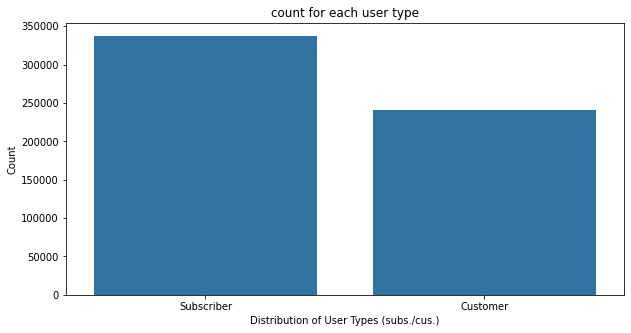

In [19]:
fig , ax = plt.subplots(figsize=(10,5))
sb.countplot(data = df, x='user_type',color= sb.color_palette()[0], ax=ax)
plt.title('count for each user type')
plt.xlabel("Distribution of User Types (subs./cus.)")
plt.ylabel("Count");

The graph shows that Subscriber(users) range between (300,000_350,000)

Customer(users) range between (200,000_250,000)

as the numbers shows in the pervious cell

### Graph for Users Age

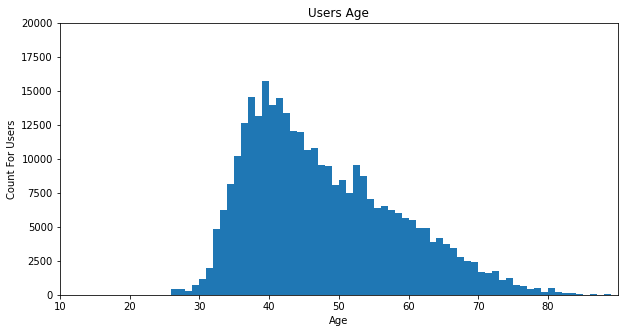

In [20]:
# we will drop nan for birth year before plot
bins = np.arange(0,df.birth_year.max()+1,1)

plt.figure(figsize=(10,5))
plt.hist(data = df.dropna(), x='birth_year',bins=bins)
plt.axis([1933,2013,0,20000])
plt.xticks([1943,1953,1963,1973,1983,1993,2003,2013],[(2013-1933),(2013-1943),(2013-1953),(2013-1963),(2013-1973),(2013-1983),(2013-1993),(2013-2003)])
plt.gca().invert_xaxis()
plt.title('Users Age')
plt.xlabel('Age')
plt.ylabel('Count For Users');

### Time of the trip per minutes

the graph shows that most time for trips equal 5 to 15 minutes for about 20,000 trips 

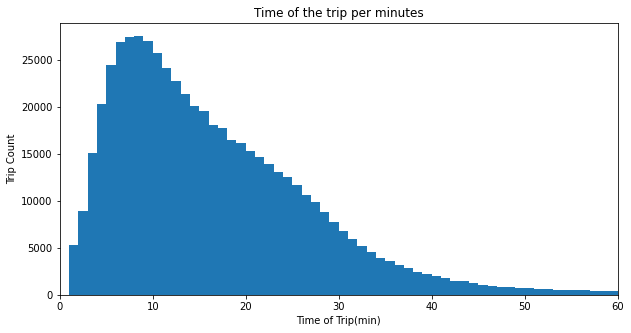

In [21]:
bins = np.arange(0, df.duration_min.max()+1,1)

plt.figure(figsize=(10,5))
plt.hist(data=df, x='duration_min',bins=bins)
plt.xlabel('Time of Trip(min)')
plt.ylabel('Trip Count')
plt.title('Time of the trip per minutes')
plt.xlim([0,60]);

let's plot once time per hour

### Time of the trip per hour

the graph shows that most trips spent between 0-1 hour and there are trips spent more than 3 hours (outliers) 

- number of trips that spent more than 3 hour = 4189 trips
- number of trips that spent more than 4 hour = 3093 trips
- number of trips that spent more than 5 hour = 2499 trips
- number of trips that spent more than 6 hour = 2099 trips

In [22]:
# fistly, I'll create duration_hour column
df['duration_hour'] = df['duration_min']/60
df['duration_hour'] = df['duration_hour'].astype(float)

In [23]:
# least trip'time
df.duration_hour.min()

0.016944444444444443

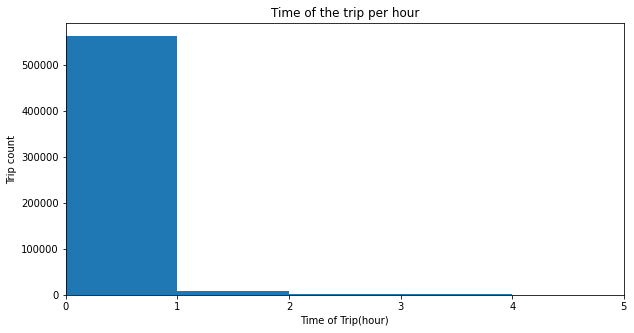

In [24]:
# ploting
bins = np.arange(0, df.duration_hour.max()+1,1)

plt.figure(figsize=(10,5))
plt.hist(data=df, x='duration_hour',bins=bins)
plt.xlabel('Time of Trip(hour)')
plt.ylabel('Trip count')
plt.title('Time of the trip per hour')
plt.xlim([0,5]);

In [25]:
# outliers ( > 3,4,5,6 hours)
print(df.query("duration_hour > 3").shape)
print(df.query("duration_hour > 4").shape)
print(df.query("duration_hour > 5").shape)
print(df.query("duration_hour > 6").shape)

(4189, 15)
(3093, 15)
(2499, 15)
(2099, 15)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

the duration per hour graph shows that there are outlier (approx 4200 trips) compared to the sum of the trips (577703 trips)

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I've converted duration(sec) column to duration(per min) and duration(per hour) by creating new coloumn for each and I've extracted the start day, month, hour from the start time of the trip in a new column for each to explore the data more easly 

## Bivariate Exploration


### The Relation Between Age of Users & Trip duration(min)


In [26]:
# Firstly, I'll create a new column for age for every user
# and We will consider 
# that we are in 2013 (the year of the dataset was established)
df['user_age'] = (2013-df.birth_year)

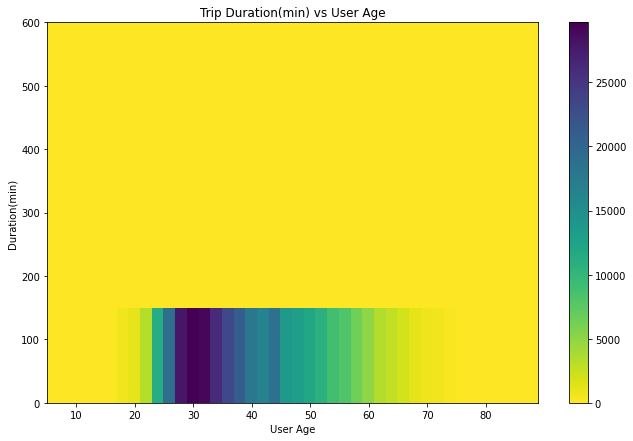

In [27]:
# ploting HeatMap to explore more easly for the ages
plt.figure(figsize=(11,7))
bins_x = np.arange(5,90+1,2)
bins_y = np.arange(0,700+1,150)
plt.hist2d(data=df, x='user_age', y='duration_min',bins=[bins_x,bins_y]
           , cmap='viridis_r')
plt.xlabel('User Age')
plt.ylabel('Duration(min)')
plt.title('Trip Duration(min) vs User Age')
plt.colorbar();

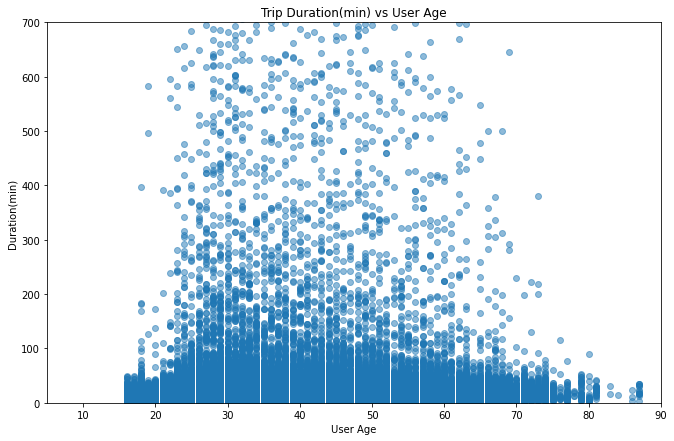

In [28]:
# Ploting Scatter to explore more easly for durations
plt.figure(figsize=(11,7))

plt.scatter(data=df, x='user_age', y='duration_min',alpha=.5)
plt.axis([5,90,0,700])  #[xmin, xmax, ymin, ymax]
plt.xlabel('User Age')
plt.ylabel('Duration(min)')
plt.title('Trip Duration(min) vs User Age');

The Two graph shows that most users(Subscribers + Customers) are aged between 20-60

and also show that higher duration is done by the younger users(25-35) 

### The relation between user type and the duration of the trip(min)

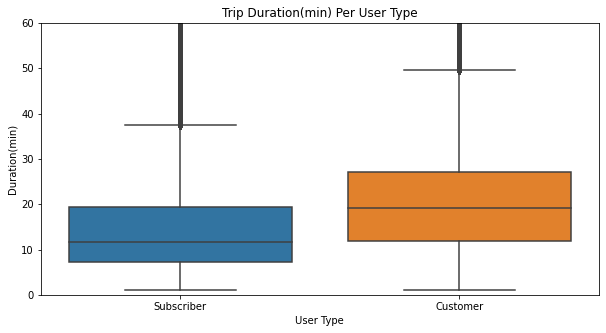

In [29]:
# ploting BoxPlot 
fig, ax = plt.subplots(figsize=(10,5))
sb.boxplot(data=df, x='user_type', y='duration_min',ax=ax)

plt.xlabel('User Type')
plt.ylabel('Duration(min)')
plt.title('Trip Duration(min) Per User Type')

# limiting to one hour
plt.ylim([0,60]);

In [30]:
df.user_type.value_counts()

Subscriber    337384
Customer      240318
Name: user_type, dtype: int64

The grah here shows that Customers(not subscribers) having a higher duration(min) for Subscribers 

Let's plot same relation but per day of the every month

### The relation between the Weekdays and the duration of the trip(min)

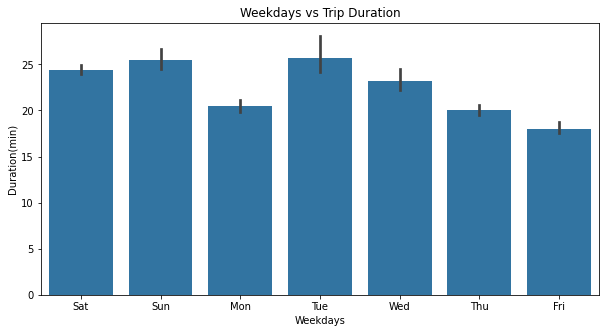

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
color = sb.color_palette()[0]
sb.barplot(data=df, x='day_n', y='duration_min',color=color)
plt.title('Weekdays vs Trip Duration')
plt.xlabel('Weekdays')
plt.ylabel('Duration(min)');

The relation shows that Saturday, Sunday, Tuesday and Wednesday have higher trip duration for Monday, Thursday and Friday


The graph show also that the average trip duration per day is approx 10 min

### The relation between  Time Trip Start(hour) and the duration of the trip(min)

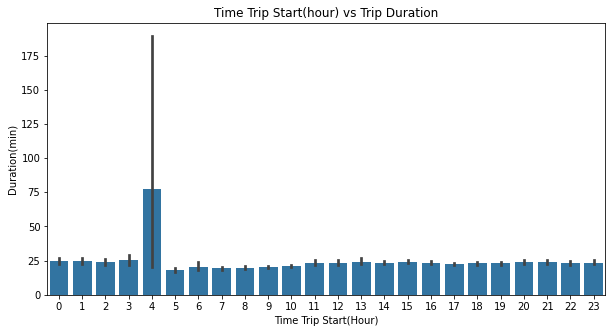

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
color = sb.color_palette()[0]
sb.barplot(data=df, x='hour', y='duration_min',color=color)
plt.title('Time Trip Start(hour) vs Trip Duration')
plt.xlabel('Time Trip Start(Hour)')
plt.ylabel('Duration(min)');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

although the number of Subscribers are 337384 and number of Cutomers are 240319 (97065 differnce) 

the customers are spent more time(duration of the trip) than Subscribers 
 
the relation between weekdays and duration of the trips indicate that Saturday, Sunday, Tuesday and Wednesday have higher trip duration for Monday, Thursday and Friday 

younger users ride bikes more than older with higher duration

the relation between the Start time trip and Duration of the trip per mintues indicate that most users prefer to go biking at 4 am with higher duration its average up to 75 min

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I think the weekdays that users prefer ride a bike are Sunday and Tuesday ,Saturday and Wednesday and they prefer also to go biking on 4 Am with higher Trip duration

## Multivariate Exploration

### Bike Sharing System per hour and User type

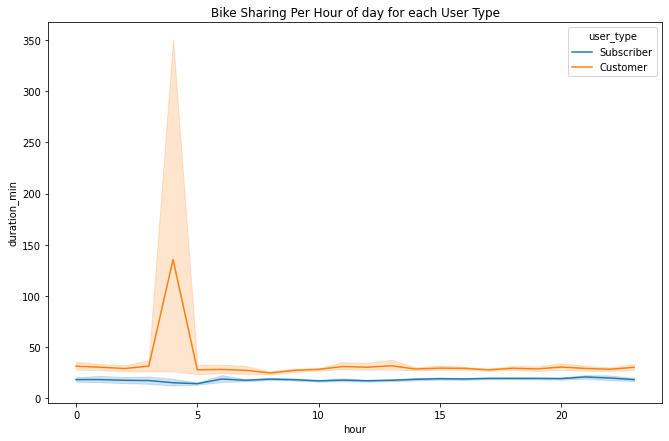

In [33]:
# ploting using lineplot 
fig, ax = plt.subplots(figsize=(11,7))
sb.lineplot(data = df, x ='hour', y = 'duration_min',hue='user_type',ax=ax)
plt.title('Bike Sharing Per Hour of day for each User Type');

### Bike Sharing System Per Month For each User Type 

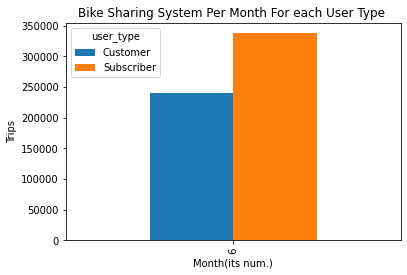

In [34]:
# sum up all trips by month 
month_trips = pd.pivot_table(data=df, values='duration_min',index=['month'],columns='user_type',aggfunc='count')

# Ploting
month_trips.plot(kind='bar')
plt.title('Bike Sharing System Per Month For each User Type ')
plt.xlabel('Month(its num.)')
plt.ylabel('Trips');

### Weekly Usage during Weekdays for Customers and Subscribers

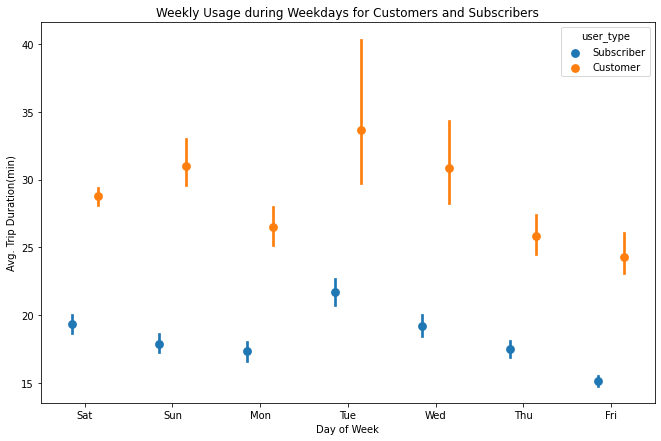

In [43]:
fig, ax = plt.subplots(figsize=(11,7))

sb.pointplot(data=df, x = 'day_n', y = 'duration_min',hue ='user_type',linestyles="",dodge=.3)
plt.title('Weekly Usage during Weekdays for Customers and Subscribers')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration(min)');

Graph shows that customers have large duration each day especially on Tue. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The graph indicates that from 3 to 5 Am Customer user prefer to go biking at this time with average trip duration 130 min and higher while subscriber doesn't prefer this time,

also the grahp shows that Customers usage is higher than that of Subcriber as we told before

### Were there any interesting or surprising interactions between features?

Yes, in the relation of (Bike Sharing System per hour and User type) 
i found that it is some how confused to customers are using Bike Sharing System more than to Subscribers and they also do higher Trip duration 